In [9]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

In [10]:
# make plots static
%matplotlib inline

In [11]:
# create a simple dataframe of animal ratings
df = pd.DataFrame({'Animal':['Pig', 'Goat' ,'Sheep', 'Frog', 'Goat', 'Goat', 'Pig', 'Sheep', 
                             'Octopus', 'Goat', 'Pig', 'Sheep', 'Octopus', 'Frog', 'Goat', 'Goat',
                            'Pig', 'Pig', 'Sheep', 'Frog', 'Frog', 'Octopus', 'Octopus'], 
                   'Rating':[3, 10, 3, 2, 9, 10, 4, 1, 
                             1, 8, 5, 6, 2, 4, 10, 9,
                            5, 5, 3, 2, 3, 1, 1]})

In [12]:
# create a class containing an animal selector drop-down, various plots, and a data table output
class RatingsDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Goat'
    Animal = param.ObjectSelector(default='Goat', objects=list(df.Animal.unique()))
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.Animal==self.Animal)].copy()
        return class_df
    
    # seaborn box plot for the chosen animal
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['Rating'])
        plt.close()
        return ax.figure
    
    # table of data for the chosen animal
    def table_view(self):
        data = self.get_data()
        return data

In [13]:
# create an instance of the class
rd = RatingsDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Animal Ratings Dashboard'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard using a dummy data set of animal ratings.'

# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Animal' drop down selector
                      rd.box_view,    # box plot
                      rd.table_view   # data table
                     )


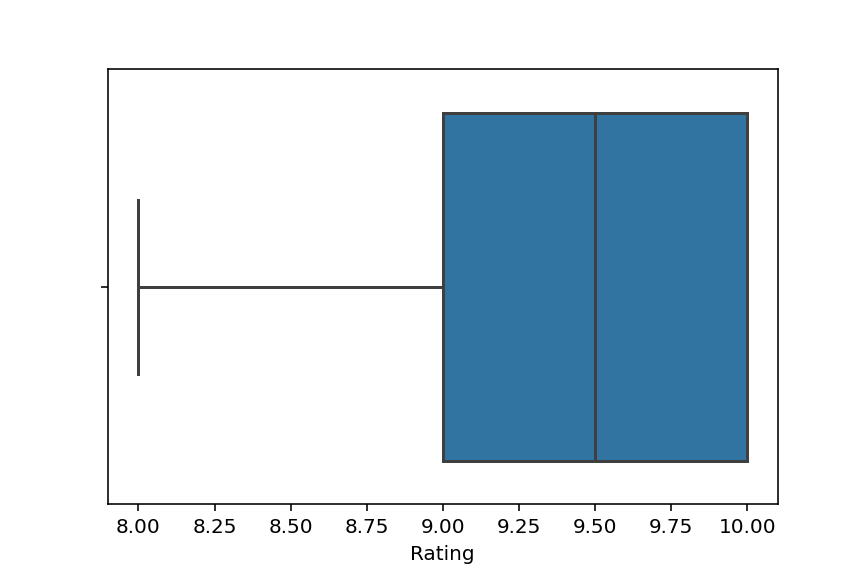
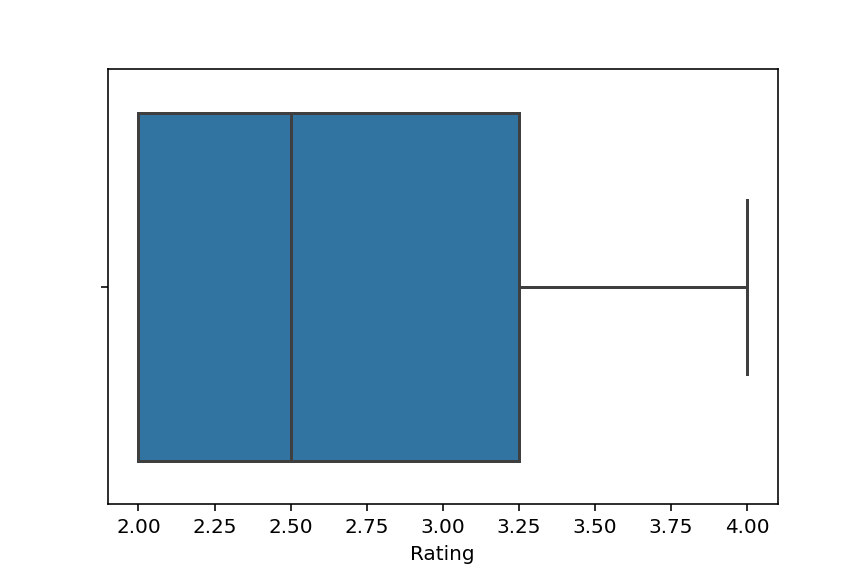
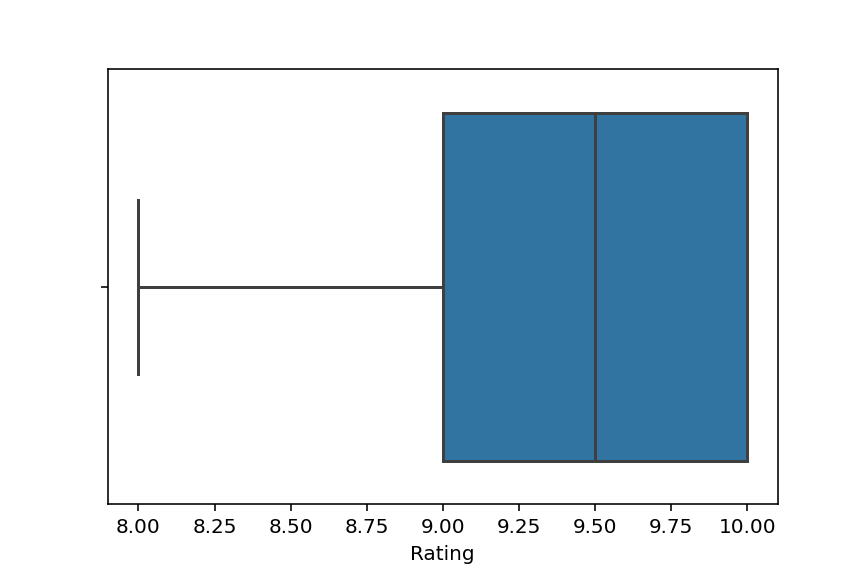
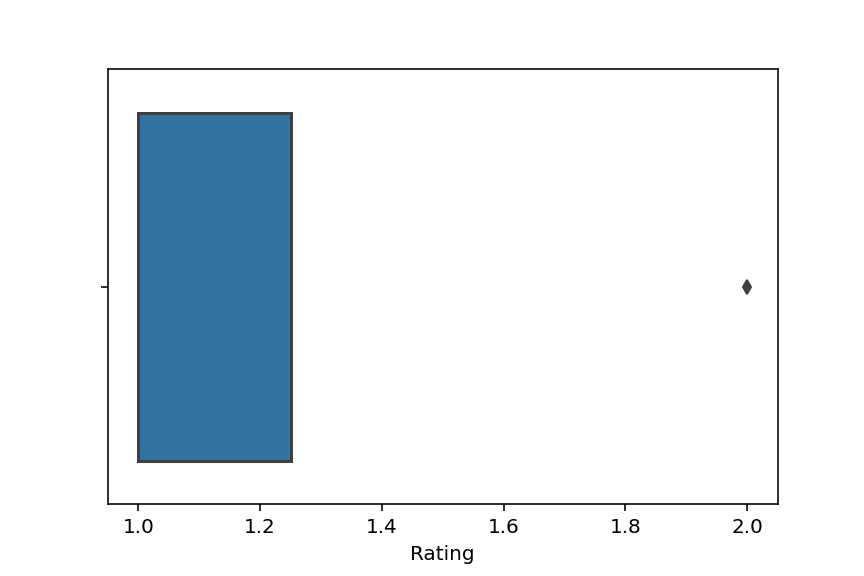
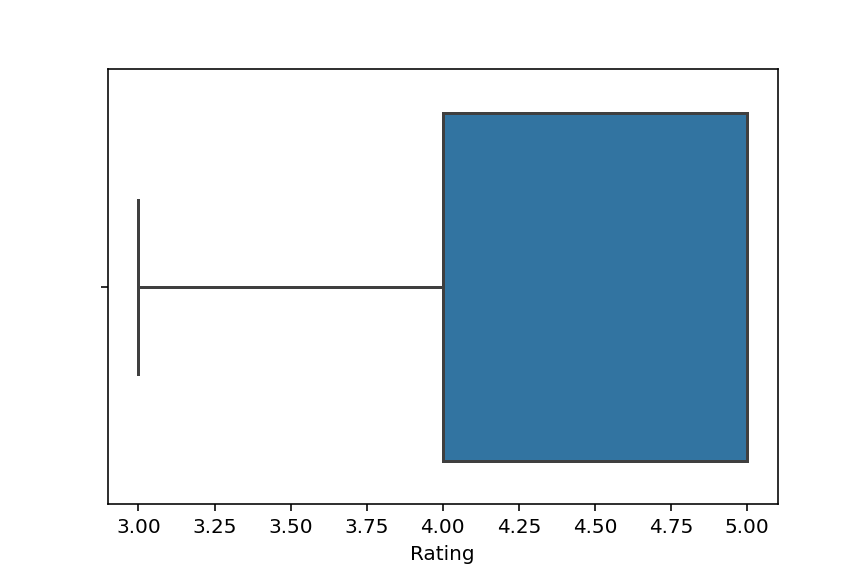
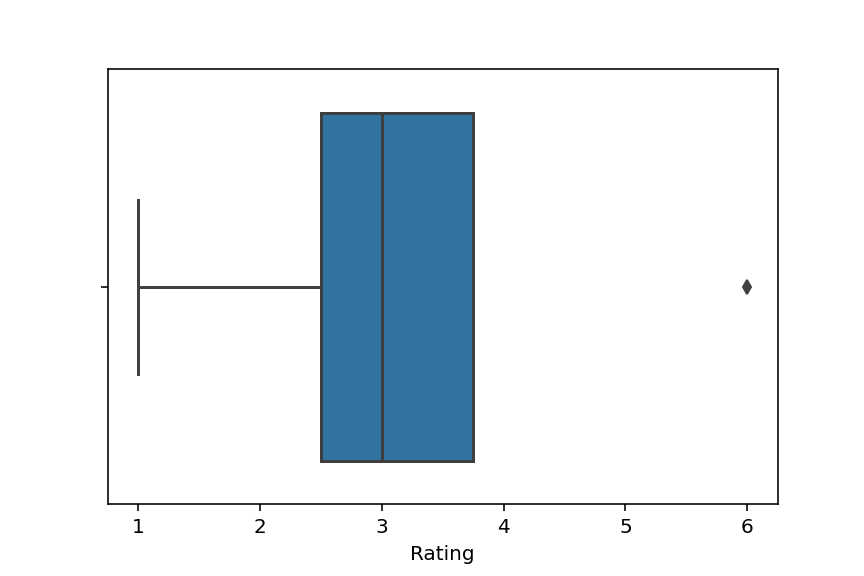

In [14]:
# show the dashboard with the data embedded 
# (for using in an html download of the notebook so that 
# no 'callback' is required from the browser to get the data)
dashboard.embed(max_opts = 5)